In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Customer Segmentation.csv")

In [3]:
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
df.columns

Index(['Unnamed: 0', 'Customer Id', 'Age', 'Edu', 'Years Employed', 'Income',
       'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [5]:
df.shape

(850, 10)

In [6]:
#checking if missing values are present
df.isna().sum()

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [7]:
#filling missing values with the mean value of that column
df=df.fillna(df["Defaulted"].mean())

In [8]:
#checking again if we successfully filled all missing values
df.isna().sum()

Unnamed: 0         0
Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

Text(0.5, 1.0, 'KDE Plot')

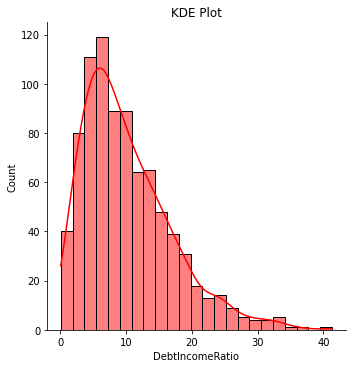

In [9]:
sns.displot(df["DebtIncomeRatio"],kde=True,color="red")
plt.title("KDE Plot")

In [10]:
#fitting the data to the model and giving 7 clusters
from sklearn.cluster import KMeans
model_km=KMeans(7)
model_km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
#segmenting the customers on basis of properties and giving them labels
labels=model_km.labels_
df["Label Of Customers"]=labels

In [12]:
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Label Of Customers
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [13]:
#checking the min label
labels.min()

0

In [14]:
#checking the max label
labels.max()

6

In [20]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
#fit only fits the data but fit_transform converts the data to array
principal_components=pca.fit_transform(df)
principal_components

array([[-600.27941473,  -28.33932132],
       [-599.03938408,   54.88983503],
       [-597.52486214,    9.13097584],
       ...,
       [ 597.57374599,  -29.11885375],
       [ 598.95124295,  -17.25484858],
       [ 600.29032452,   20.93620502]])

In [21]:
#create dataframe with 2 compenents
pca_df=pd.DataFrame(principal_components,columns=["PCA1","PCA2"])
pca_df.head()

,PCA1,PCA2
0,-600.279415,-28.339321
1,-599.039384,54.889835
2,-597.524862,9.130976
3,-596.034086,-29.795618
4,-595.105862,206.611208


In [22]:
#concatenate the cluster labels with the dataframe
pca_df=pd.concat([pca_df,pd.DataFrame({"Cluster Labels":labels})],axis=1)
pca_df.head()

,PCA1,PCA2,Cluster Labels
0,-600.279415,-28.339321,0
1,-599.039384,54.889835,0
2,-597.524862,9.130976,0
3,-596.034086,-29.795618,0
4,-595.105862,206.611208,0


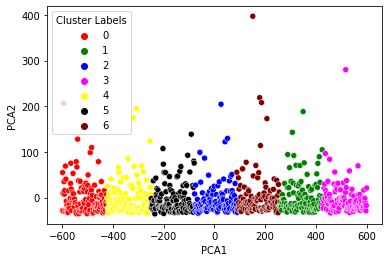

In [28]:
sns.scatterplot(x="PCA1",y="PCA2",hue="Cluster Labels",data=pca_df,palette=["red","green","blue","magenta","yellow","black","maroon"])